<a href="https://colab.research.google.com/github/Son-github/MachineLearning_Study/blob/main/chapter6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-03-25 09:56:00--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-25 09:56:00--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-25 09:56:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
from sklearn.decomposition import PCA #주성분 분석 알고리즘을 제공
pca = PCA(n_components=50) #pca클래스의 객체를 만들 때, n_components매개변수에 주성분의 개수를 지정. k-평균과 마찬가지로 비지도학습이기 때문에 fit() 메서드에 타깃값을 제공하지않음.
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape) #PCA클래스가 찾은 주성분은 components_속성에 저장.
#n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50, 즉 50개의 주성분을 찾음. 두 번째 차원은 항상 원붠 데이터의 특성 개수와 같은 10000.

(50, 10000)


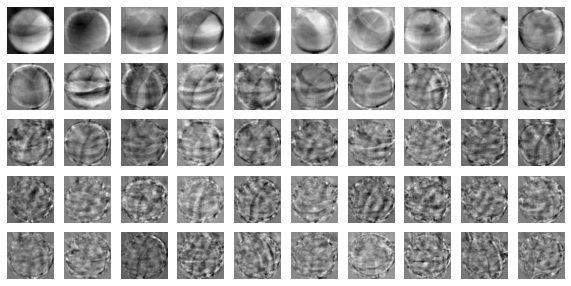

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1): #3차원 배열을 입력받아 가로로 10개씩 이미지를 출력. figsize는 ratio에 비례하여 커짐.
  n = len(arr) #샘플의 개수
  rows = int(np.ceil(n/10)) #ceil함수는 주어진 숫자와 같은 정수 또는 주어진 숫자보다 큰 가장 가까운 정수를 리턴.
  cols = n if rows < 2 else 10 #행이 1개이면 열의 개수는 샘플의 개수, 그렇지 않으면 10개
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: #n개 까지만 그리기
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()
draw_fruits(pca.components_.reshape(-1,100,100)) #원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) #(300, 10000)이던 fruits_2d파일을 (300, 50)으로 변환

(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) #원본 데이터로 재구성
print(fruits_inverse.shape)

(300, 10000)


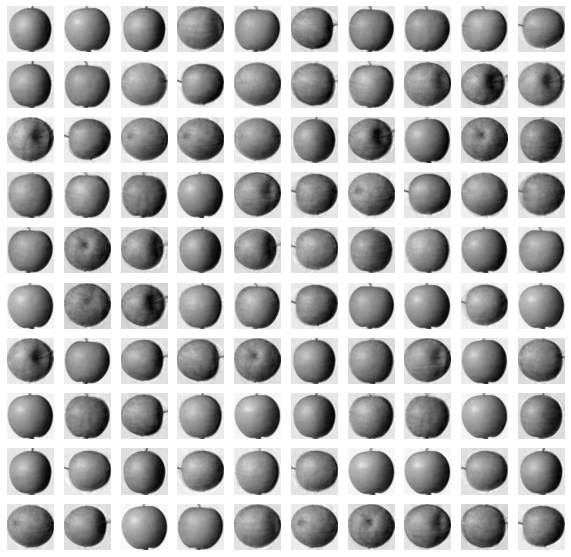

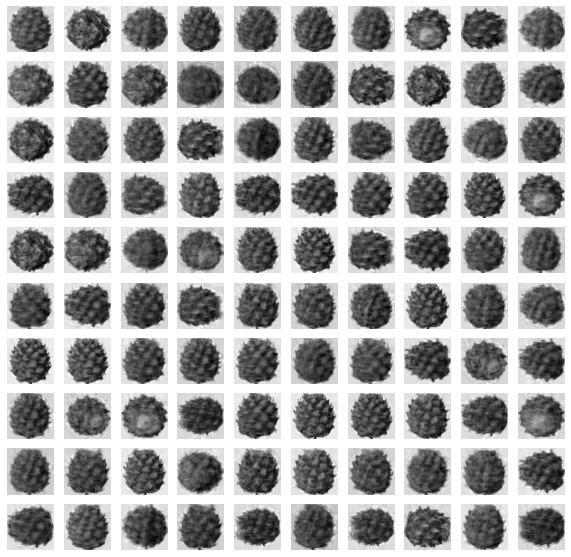

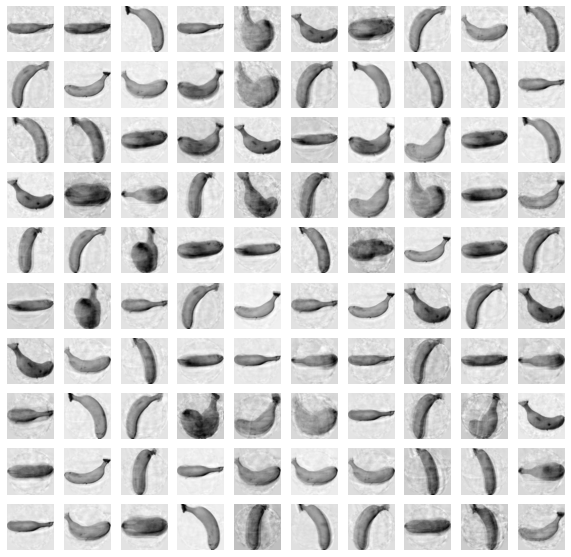

In [ ]:
fruits_recontstruct = fruits_inverse.reshape(-1, 100, 100) #재구성된 원본 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력.
for start in [0, 100, 200]:
  draw_fruits(fruits_recontstruct[start:start+100])
  print('\n')

In [ ]:
print(np.sum(pca.explained_variance_ratio_)) #explained_variance_ratio_에 각 주성분이 설명된 분산(주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값) 비율이 기록되어 있음.

0.9215299541268729


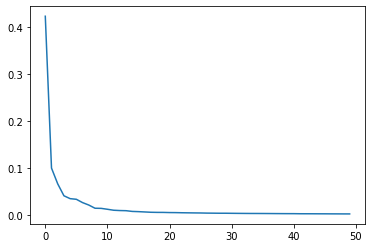

In [ ]:
plt.plot(pca.explained_variance_ratio_) #설명된 분산을 그래프로 출력
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target) #교차 검증 시행
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있음.

0.9966666666666667
1.76930890083313


In [ ]:
scores = cross_validate(lr, fruits_pca, target) #50개의 특성만을 사용했지만 정확도 100%이고 훈련 시간은 0.02초로 감소.
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02178053855895996


In [ ]:
pca = PCA(n_components=0.5) #n_components매개변수에 주성분의 개수 대신 원하는 설명된 분산의 비율 입력 가능. 분산의 비율이 입력되면 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_) #2개의 주성분을 찾음

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target) #2개의 특성만을 사용
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03190937042236328


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) #k-평균 알고리즘
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


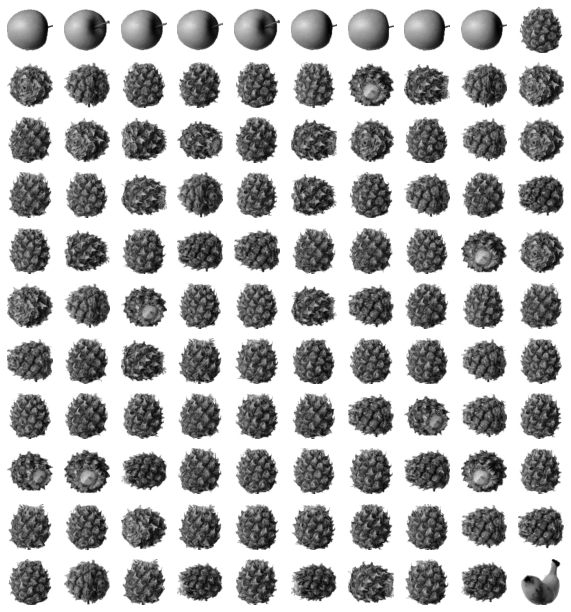

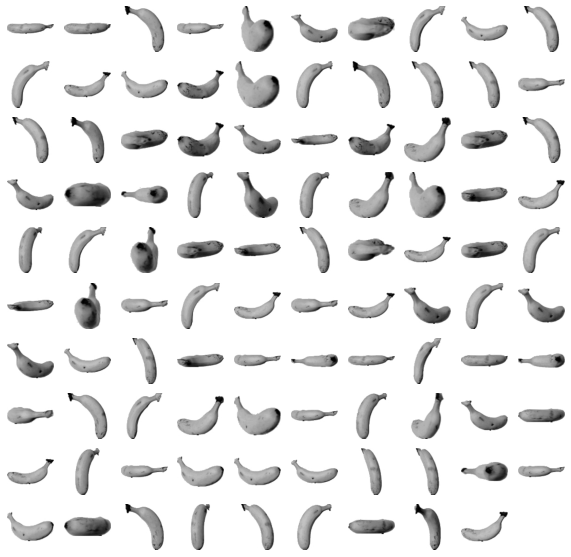

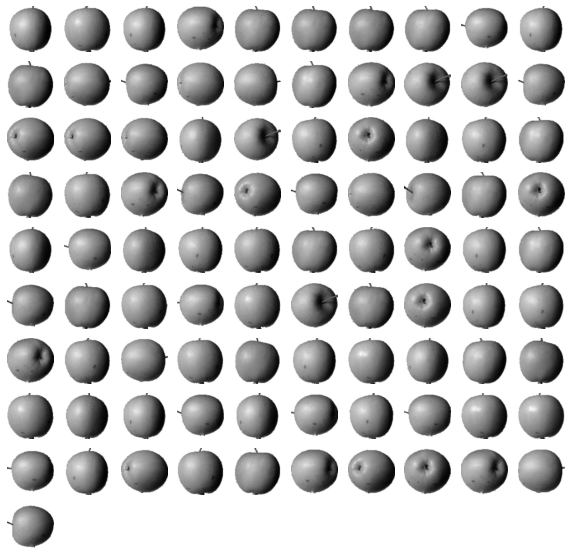

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

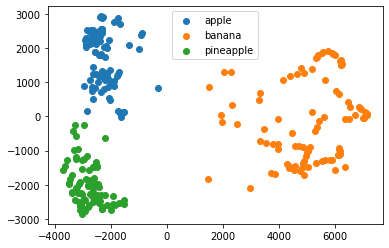

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label] #km.labels_를 사용해 클라스터별로 나누어 산점도를 그림
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()